In [1]:
## Bring in needed mods
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as ss, seaborn as sns

In [2]:
%matplotlib inline

In [3]:
## Set data paths
parent_data_path = "../../PHENOTYPE/AMOEBA/HALOS/bt22xftc555_halo_new_parents.csv"
old_data_path = "../../PHENOTYPE/AMOEBA/HALOS/bt22xftc555_halo_old.csv"
new_data_path = "../../PHENOTYPE/AMOEBA/HALOS/bt22xftc555_halo_new.csv"

In [4]:
## Bring in clone groups
clones = pd.read_csv('../../NOTES/Clone_strains.csv')
clones.head()

,s1,s2,s3,s4
0,PMY2556,PMY2557,PMY2566,PMY2574
1,PMY2559,PMY2577,NaN,NaN
2,PMY2560,PMY2562,PMY2595,NaN
3,PMY2564,PMY2579,NaN,NaN
4,PMY2568,PMY2597,NaN,NaN


In [5]:
## Bring in the parent phenotype data
halo_parent = pd.read_csv(parent_data_path)
parent_pmy = halo_parent.PMY.unique()

In [6]:
## Gather all the clone names
clone_names_all = np.concatenate([s.dropna() 
                    for i,s in clones.iterrows()])
len(clone_names_all)

80

In [7]:
## Are the parents in the clone groups?
[s in clone_names_all for s in parent_pmy]

[False, False]

In [8]:
## Bring in the progeny halo data
halo_old = pd.read_csv(old_data_path)
halo_new = pd.read_csv(new_data_path)

In [60]:
## Concatonate dataframes
halo = pd.concat([halo_old,halo_new],axis=0)

halo['Halo_in'] = halo.Halo

halo['Halo'] = (np.sqrt(halo.Halo_in)*2.45)**2
halo.tail()

,PMY,Replicate,Halo,Halo_in
993,PMY2939,2,4.021675,0.670
994,PMY2939,3,5.516297,0.919
995,PMY2940,1,36.747305,6.122
996,PMY2940,2,47.767895,7.958
997,PMY2940,3,40.102703,6.681


In [10]:
clones['Nclones'] = [len(cg.dropna()) for i,cg in clones.iterrows()]

In [11]:
clones['Phenotypes'] = [len(halo[(halo.PMY.isin(cg.dropna().values))].PMY.unique())  
                                for i,cg in clones.iterrows()]

In [65]:
cghalo

,PMY,Replicate,Halo,Halo_in
0,PMY2556,1,15.684533,2.613
1,PMY2556,2,24.148058,4.023
2,PMY2557,1,16.002665,2.666
3,PMY2557,2,14.940223,2.489
20,PMY2566,1,7.815255,1.302
21,PMY2566,2,13.439598,2.239
36,PMY2574,1,5.078115,0.846
37,PMY2574,2,7.401083,1.233


In [89]:
myylabel = 'Amoeba clearance area (cm$^2$)\n$\longleftarrow$resistant - sensitive$\longrightarrow$'

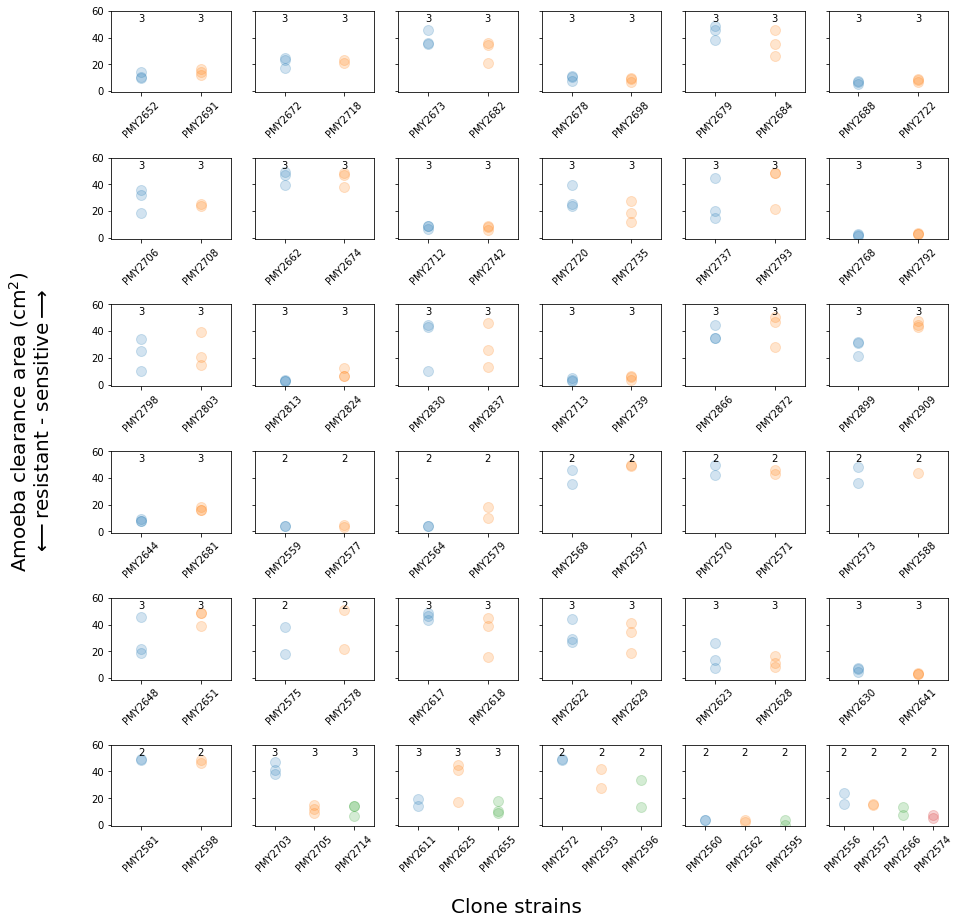

In [102]:
## Plot each clone group
fig,ax = plt.subplots(6,6,figsize=(15,15),sharey=True)

for i,j in clones[(clones.Phenotypes>1)].sort_values('Phenotypes').reset_index(drop=True).iterrows():
    
    plt.sca(ax.ravel()[i])
    cghalo = halo[halo.PMY.isin(j[j.index[:4]].dropna().values)]
    #plt.boxplot([a.Halo for s,a in cghalo.groupby('PMY')]);
    
    [plt.plot(z*np.ones(len(a.Halo)),a.Halo,'o',
              markersize=10,alpha=0.2) 
           for z,(s,a) in enumerate(cghalo.groupby('PMY'))]
    
    [plt.text(z,58,s=len(a.Halo),ha='center',va='top') 
     for z,(s,a) in enumerate(cghalo.groupby('PMY'))]
    
    cgs = [s for s,a in cghalo.groupby('PMY')]
    plt.xticks(np.arange(len(cgs)),cgs,rotation=45)
    
    plt.xlim(-0.5,len(cgs)-0.5)
    
    plt.ylim(-1,60)
plt.subplots_adjust(hspace=0.8)

fig.text(0.5,0.05,'Clone strains',
         fontsize=20,va='center',ha='center')
fig.text(0.05,0.5,myylabel,fontsize=20,
         rotation=90,va='center',ha='center');
plt.savefig('../../FIGURES/Attack_of_the_clones.pdf',
            dpi=200,bbox_inches='tight');

In [52]:
halo[(halo.PMY.isin(['PMY2673',	'PMY2682']))]

,PMY,Replicate,Halo
204,PMY2673,1,5.925
205,PMY2673,2,7.625
206,PMY2673,3,5.954
231,PMY2682,1,5.798
232,PMY2682,2,3.544
233,PMY2682,3,6.003


In [23]:
onlyone = np.concatenate(clones[(clones.Phenotypes==1)][['s1','s2']].values)

In [24]:
halo[(halo.PMY.isin(onlyone))]

,PMY,Replicate,Halo
881,PMY2902,1,1.188
882,PMY2902,2,1.184
883,PMY2902,3,1.673


In [103]:
clones.tail()

,s1,s2,s3,s4,Nclones,Phenotypes
32,PMY2813,PMY2824,NaN,NaN,2,2
33,PMY2830,PMY2837,NaN,NaN,2,2
34,PMY2866,PMY2872,NaN,NaN,2,2
35,PMY2899,PMY2909,NaN,NaN,2,2
36,PMY2900,PMY2902,NaN,NaN,2,1
